In [31]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import datasets

# Musroom datasety
mushrooms = pd.read_csv("agaricus-lepiota.data") 

# Convert it to a pandas DataFrame
df = pd.DataFrame(mushrooms)

# Show data about the entire dataset
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


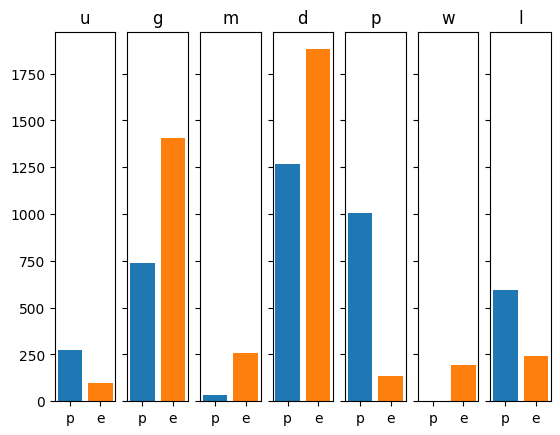

In [32]:
# Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
def plot(name1, name2):

    # axis_1 holds all unique values (rows?) from the index of name1 from the dataframe 'df'
    axis_1 = df[name1][:].unique()
    axis_2 = df[name2][:].unique()

    # creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 
    fig, axs = plt.subplots(1,len(axis_1), sharey=True)


    for i in range(len(axis_1)):
        # Set the title to the value at the axis position
        axs[i].set_title(axis_1[i])
        for j in range(len(axis_2)):
            name2_by_name1 = df[:][(df[name2] == axis_2[j]) & (df[name1] == axis_1[i])].count()[name1].item()
            axs[i].bar(axis_2[j], name2_by_name1)
    plt.show()
    
plot("habitat", "edibility")

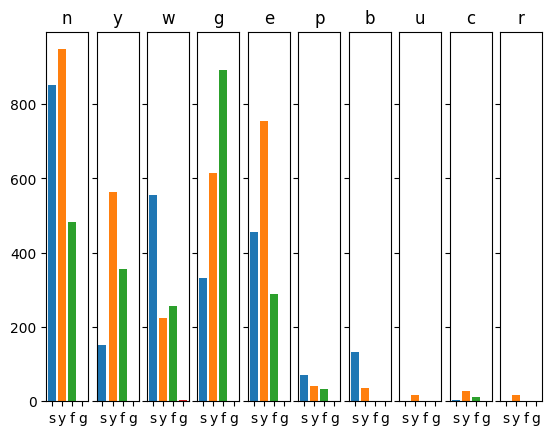

In [33]:
plot("cap-color", "cap-surface")

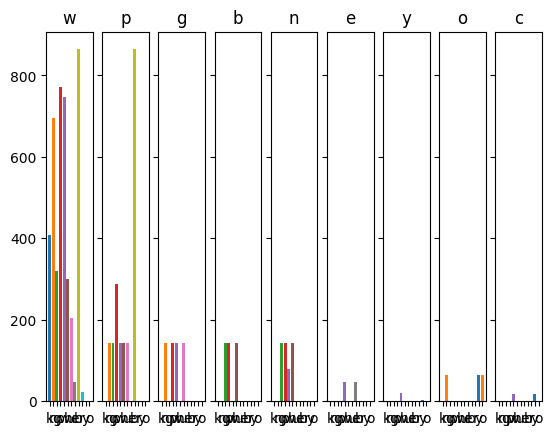

In [34]:
plot("stalk-color-below-ring", "gill-color")

In [38]:
dummy_df = pd.get_dummies(df)
dummy_df

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


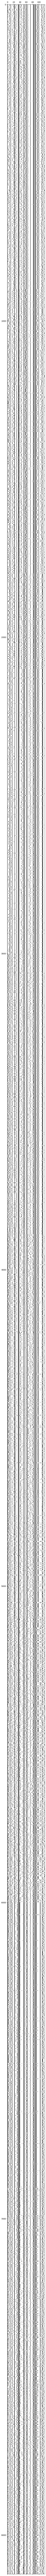

In [41]:
# Plot the sparsity pattern of a 2D array. This visualizes the non-zero values of the array.

plt.spy(dummy_df)
fig = plt.gcf()
#fig.set_size_inches(80,150)

fig.set_size_inches(120,250)
plt.show()